# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [1]:
# libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# importing the data
data = pd.read_csv('stock_data.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [3]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 340 rows and 15 columns.


### Displaying few rows of the dataset

In [4]:
# viewing a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Checking the data types of the columns for the dataset

In [5]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Creating a copy of original data

In [6]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

In [8]:
# checking for missing values in the data
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [9]:
# viewing the statistical summary of the numerical columns in the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


### Observations
- The GICS sector has 11 unique values, with Industrials being the top sector.
- The GICS sub-industry has 104 unique values, with Oil & Gas Exploration & Production being the top sub-industry.
- The average Return on Equity (ROE) is 39.5, the median ROE is 15, and the maximum ROE is 917.
- The average net cash flow value is 55,537,620 dollars and the average net income is 1,494,384,602 dollars.
- The average earnings per share is 2.77, with a minimum value of -61.2 and a maximum value of 50.09.

## Exploratory Data Analysis

### Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # for histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # add median to the histogram

**`Current Price`**

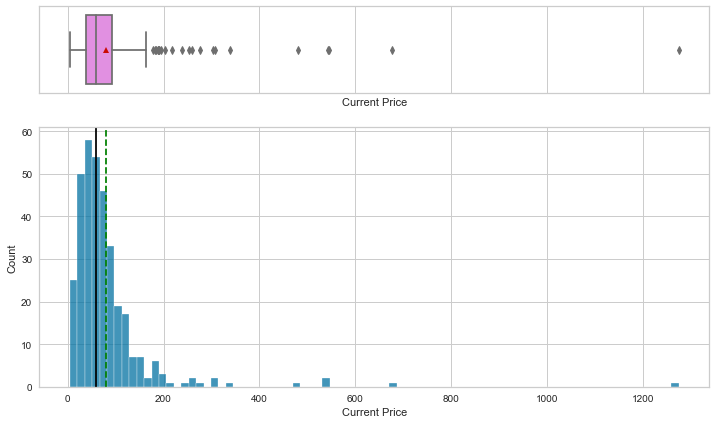

In [11]:
# creating histogram and boxplot for 'Current Price'
histogram_boxplot(df, 'Current Price')

### Observation

Current price of the stock has a right-skewed distribution with a mean value of around 80 dollars and a median value of around 60 dollars. This suggests that the majority of the stock prices fall below the mean value, indicating that there may be some expensive stocks that are driving up the average price. Additionally, there are numerous outliers in the data, which may indicate extreme price movements or other factors impacting the stock price. Outliers can have a significant impact on statistical measures such as the mean and standard deviation, so investors should exercise caution when interpreting these values.

**`Price Change`**

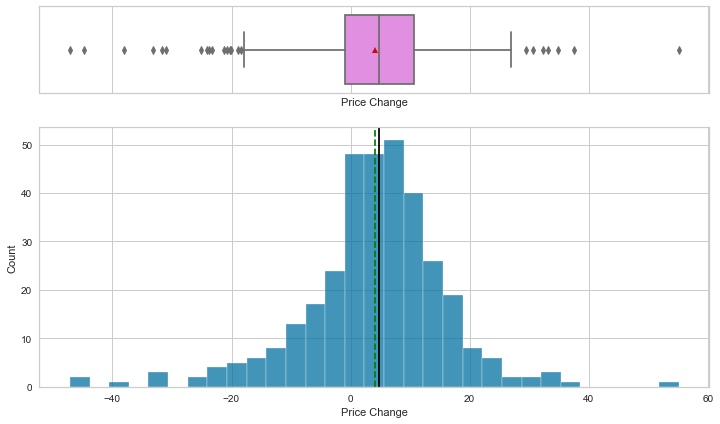

In [12]:
# creating histogram and boxplot for 'Price Change'
histogram_boxplot(df, 'Price Change')

### Observation

The distribution of price change over a 13-week period appears to be normally distributed. The data suggests that the mean and median values of the percentage price change are both around $5, indicating that, on average, the stock prices have increased by a similar percentage over the 13-week period. However, it's worth noting that the normal distribution assumption may not hold true for all stocks, and some may exhibit more extreme price changes than the distribution suggests.

**`Volatility`**

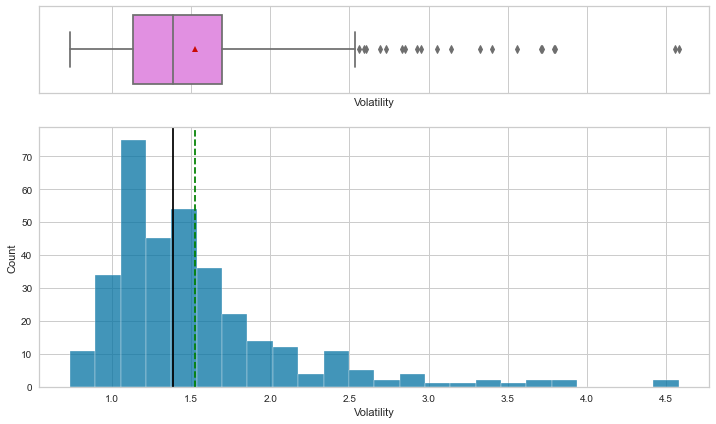

In [13]:
# creating histogram and boxplot for 'Volatility'
histogram_boxplot(df,'Volatility')

### Observation

Volatility refers to the degree of variation in a stock's price over time (calculated here as the standard deviation of the stock price over the past 13 weeks). The data show an average standard deviation of 1.5, indicating that the stock prices have exhibited moderate volatility over the period. The maximum deviation is 4.58, which suggests that some stocks have experienced significant price swings during the period. Deviations above 1.7 are considered outliers in the data, which may indicate unusual price movements or other factors impacting the stock price.

**`ROE`**

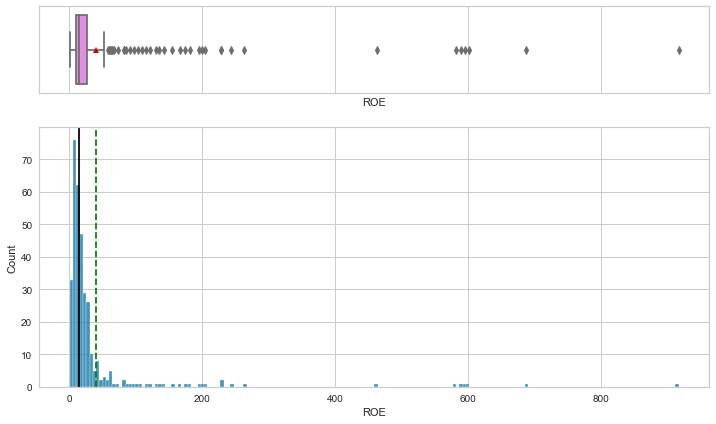

In [14]:
# create histogram and boxplot for 'ROE'
histogram_boxplot(df, 'ROE')

### Observation

The distribution of Return On Equity (ROE)(company's profitability relative to its shareholder equity), appears to be skewed to the right. The average ROE value is 39.5, indicating that the companies, on average, have a healthy return on equity. However, the median ROE value is 15, suggesting that there are several companies with lower profitability dragging down the median value. The maximum ROE value is 917, indicating that there are a few companies with extremely high profitability relative to their shareholder equity. Overall, the right-skewed distribution suggests that there are several outliers with very high ROE values driving up the average.

**`Cash Ratio`**

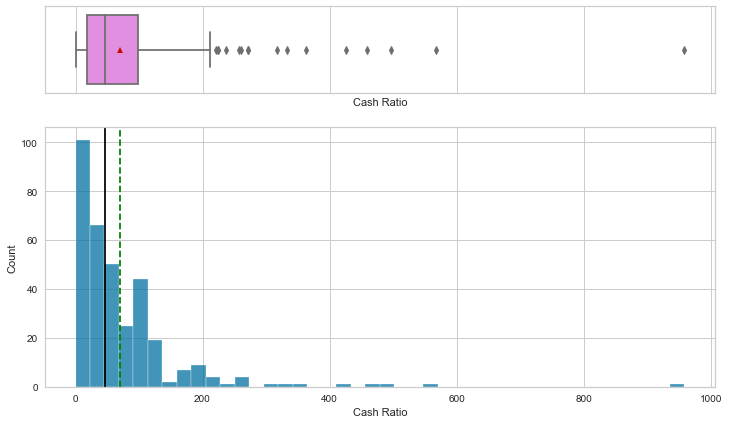

In [15]:
# creating histogram and boxplot for 'Cash Ratio'
histogram_boxplot(df,'Cash Ratio')

### Observation

Cash ratio measures a company's ability to pay off its short-term liabilities with its available cash reserves (total cash reserves divided by total current liabilities). The average cash ratio across the data set is 70, indicating that the companies, on average, have sufficient cash reserves to cover their current liabilities. The median cash ratio is 47. The standard deviation is 90, implying that there is a significant degree of variability in cash ratios across the companies in the data set.

**`Net Cash Flow`**

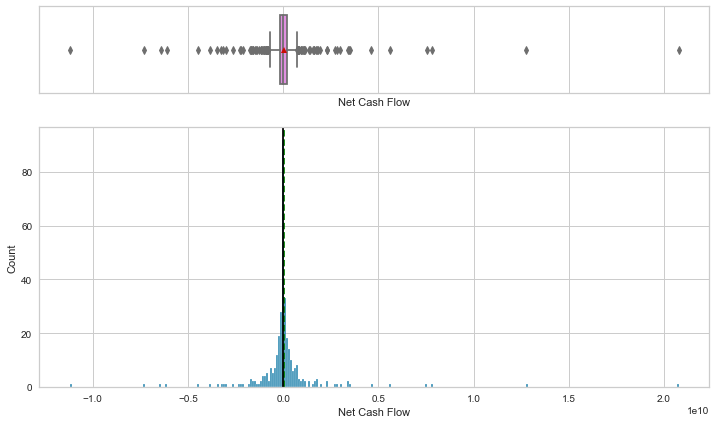

In [16]:
# creating histogram and boxplot for 'Net Cash Flow'
histogram_boxplot(df,'Net Cash Flow')

### Observation

The distribution of net cash flow appears to be normally distributed. The average net cash flow value is 55,537,620 dollars, indicating that the central tendency of the distribution is around this value. The minimum net cash flow value is -11,208,000,000 dollars, which may indicate a significant cash outflow for some companies, potentially due to investments or debt payments. The maximum net cash flow value is 20,764,000,000 dollars, indicating that some companies experienced a significant inflow of cash during the period, potentially due to strong operating performance or other factors such as asset sales.

**`Net Income`**

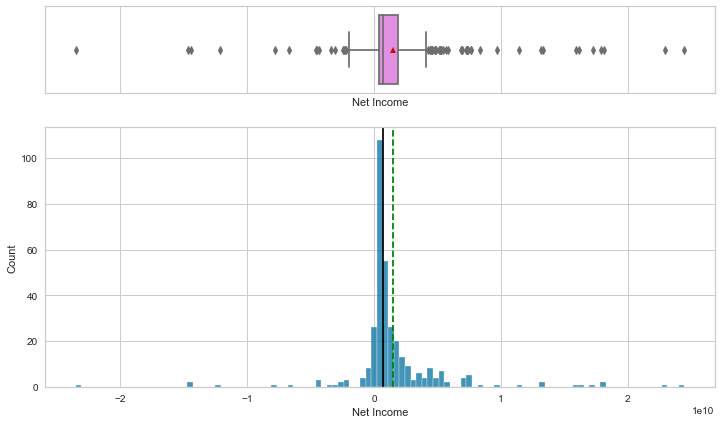

In [17]:
# creating histogram and boxplot for 'Net Income'
histogram_boxplot(df,'Net Income')

### Observation

The average net income (revenues minus expenses, interest, and taxes) is 1,494,384,602 dolars. The minimum net income in the data set is a loss of 23,528,000,000 dollars, indicating that some companies experienced significant financial losses during the period. The maximum net income is 24,442,000,000 dollars, suggesting that some companies enjoyed high levels of profitability during the period.

**`Earnings Per Share`**

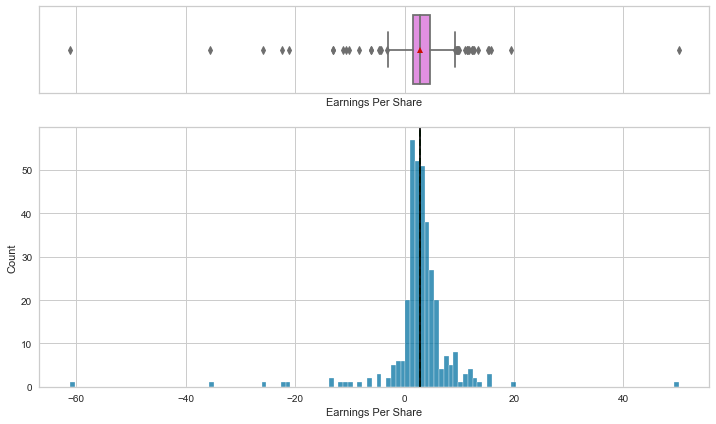

In [18]:
# creating histogram and boxplot for 'Earnings Per Share'
histogram_boxplot(df,'Earnings Per Share')

### Observation

The distribution of earnings per share appears to be normally distributed. The mean and median values are both between 2.7 and 2.9 dollars, indicating that the central tendency of the distribution is around this range. The standard deviation is 6.5 dollars, suggesting a moderate amount of variability around the mean. The minimum value of earnings per share is -61.2 dollars, indicating a significant loss per share for some companies. The maximum value of earnings per share is 50.1 dollars, which may indicate a highly profitable company with exceptional earnings performance.

**`Estimated Shares Outstanding`**

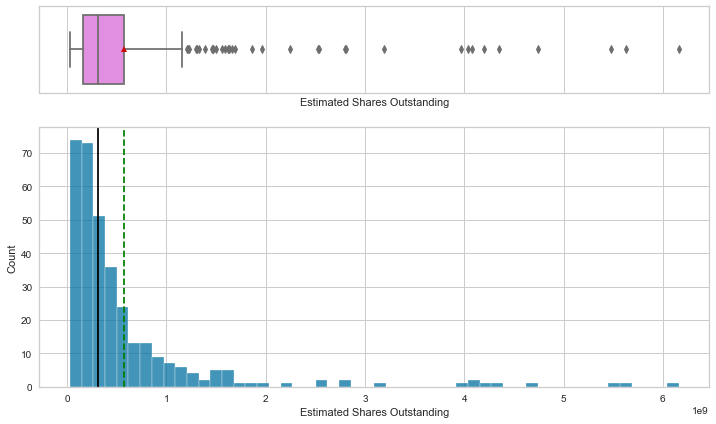

In [19]:
# creating histogram and boxplot for 'Estimated Shares Outstanding'
histogram_boxplot(df,'Estimated Shares Outstanding')

### Observation

The distribution of currently held shares by shareholders is positively skewed, with an average of 577,028,337 shares. The minimum number of shares held is 27,672,157. The median number of shares held is 309,675,138. The maximum number of shares held is 6,159,292,035, which may indicate a large shareholder or group of shareholders with significant ownership in the company.

**`P/E Ratio`**

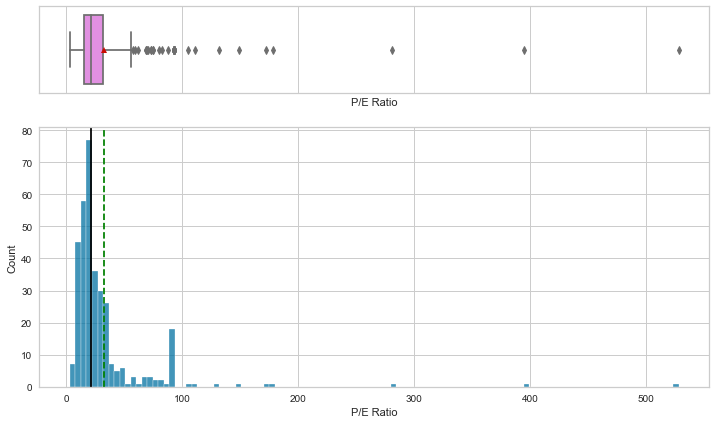

In [20]:
# creating histogram and boxplot for 'P/E Ratio'
histogram_boxplot(df,'P/E Ratio')

### Observation

The price-to-earnings (P/E) ratio compares a company's current stock price to its earnings per share. The average P/E ratio for the given data set is 33, indicating that investors are willing to pay $33 for every dollar of earnings. The minimum P/E ratio is 2.9, which may suggest an undervalued stock or strong earnings growth potential. The median P/E ratio is 20.8, implying that half of the companies have P/E ratios above this value, and the other half have ratios below. The maximum P/E ratio is 528, which may indicate an overvalued stock or exceptionally high earnings growth expectations.

**`P/B Ratio`**

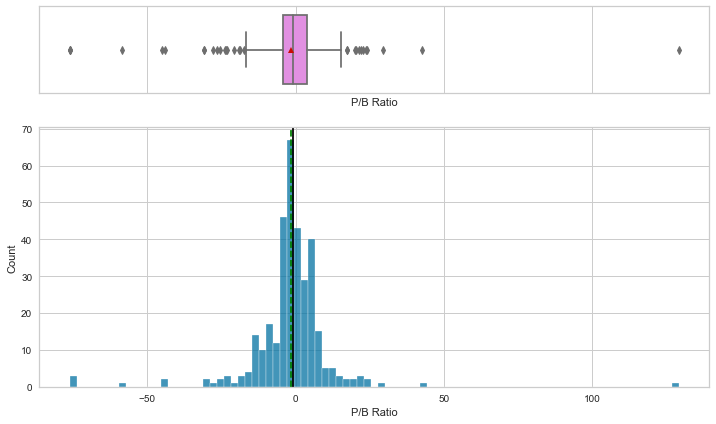

In [21]:
# creating histogram and boxplot for 'P/B Ratio'
histogram_boxplot(df,'P/B Ratio')

### Observation

The price-to-book (P/B) ratio measures a company's stock price per share relative to its book value per share. The average P/B ratio for the given data set is -1.71, indicating that the average stock price is trading below its book value. The minimum P/B ratio is -76.11, suggesting an undervalued stock or potentially poor financial performance. The median P/B ratio is -1.06. The maximum P/B ratio is 129.1, which may indicate an overvalued stock or a high level of investor confidence in the company's future prospects.

In [22]:
# function to create labeled barplots

def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

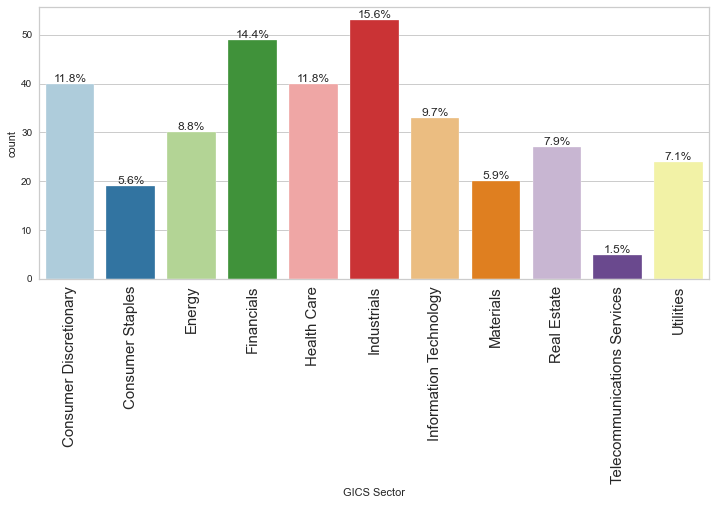

In [23]:
# creating a labeled barplot for 'GICS Sector'
labeled_barplot(df, 'GICS Sector', perc=True)

### Observation

Based on the Global Industry Classification Standard (GICS), the Industrials sector has the largest number of companies, with 53 firms, accounting for 15.6% of all companies in the GICS sectors. The Financials sector comes in second with around 49 companies, comprising 14.4% of the total, followed by Consumer Discretionary and Health Care, both with 40 companies, accounting for 11.8% of all companies in each sector.

**`GICS Sub Industry`**

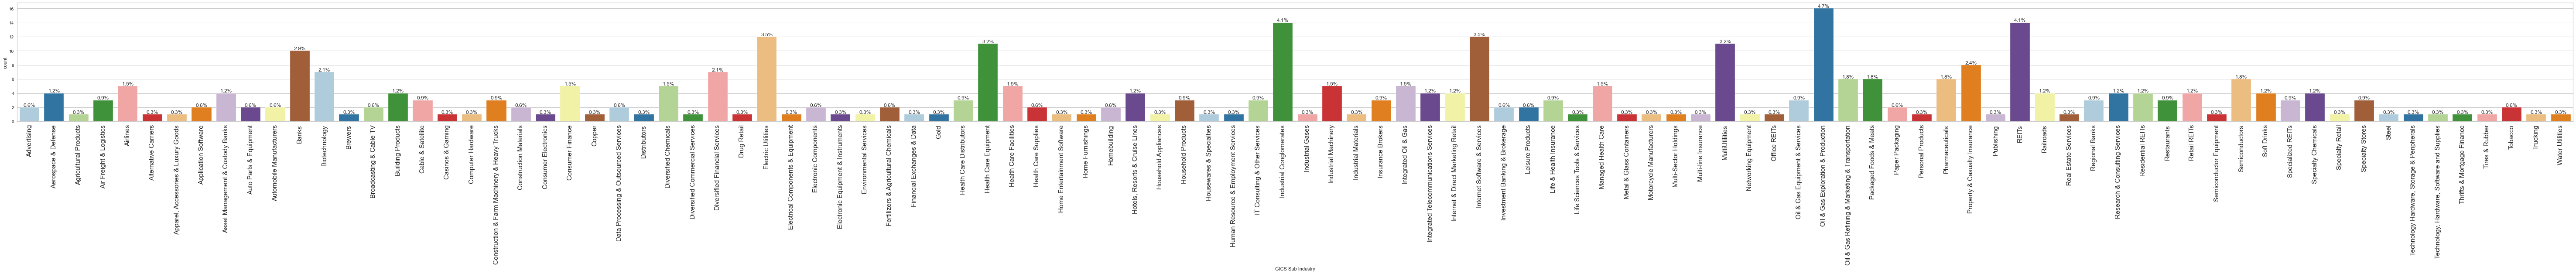

In [24]:
# creating a labeled barplot for 'GICS Sub Industry'
labeled_barplot(df, 'GICS Sub Industry', perc=True)

### Observation

The plot shows percentage of companies within various GICS Sub Industries, with the largest being Oil & Gas Exploration & Transportation, which has a count of 16 companies, representing 4.7% of the total companies in the dataset. The next largest sub-industries are Industrial Conglomerates and REITs, both with a count of 14 companies each, representing 4.1% of the total companies. Electric Utilities and Internet Software & Services are also prominent sub-industries, with a count of 12 companies each, representing 3.5% of the total companies in the dataset. Together, these five sub-industries make up the largest portion of the dataset, highlighting the importance of these industries in the economy.

### Bivariate Analysis

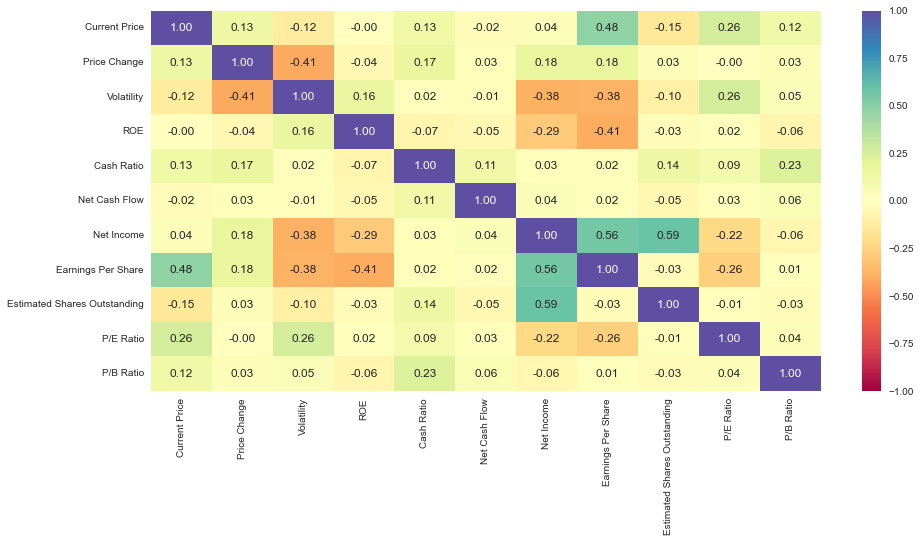

In [25]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Observation

The heatmap shows that estimated shares outstanding and net income have a strong positive correlation (0.59), followed by a moderately strong positive correlation between earnings per share and net income (0.56). There is also a relatively, moderate positive correlation between earnings per share and current price (0.48), as well as between volatility and price change (0.41) and earnings per share and ROE (0.41).

**Checking the stocks of economic sectors that have seen the maximum price increase on average.**

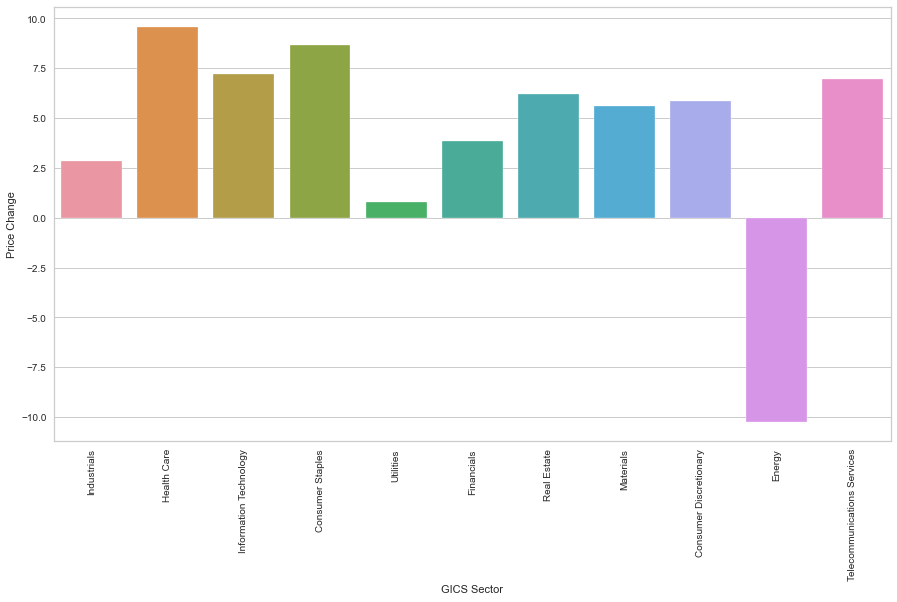

In [26]:
# plotting a barplot to visualize the relationship between "GICS Sector" and "Price Change"
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation

On average, the healthcare sector has shown the highest positive price change, with an increase of around 9 dollars in stock price. The consumer staples sector follows closely behind, with an average stock price change of about 8.5 dollars. However, the energy sector has experienced the largest negative price change, with a decrease of over -10 dollars on average.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. We want to see how the average cash ratio varies across economic sectors.**

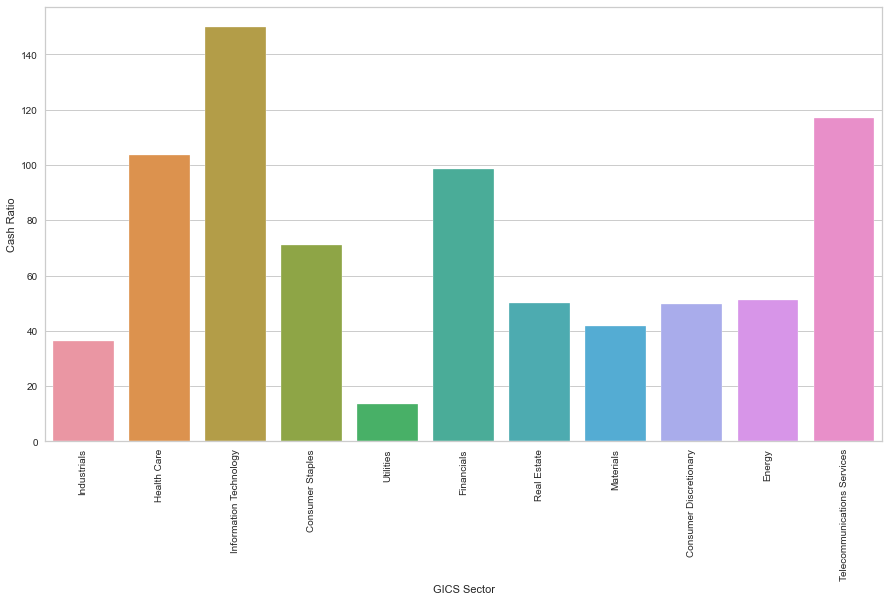

In [27]:
# plotting a barplot to visualize the relationship between "GICS Sector" and "Cash Ratio"
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation

The information technology sector has the highest cash ratio of all GICS sectors at around 150, followed by telecommunications services at just under 120, and Health care slightly above 100. The sector with the lowest cash ratio is Utilities at just over 10. The high cash ratios of the Information Technology, Telecommunications Services, and Health Care sectors suggest that companies within these industries have strong financial positions, with a high level of cash reserves relative to their current liabilities. This provides them with financial flexibility to invest in new projects, weather economic downturns, and make strategic acquisitions or partnerships, which can lead to growth and innovation in their respective industries.

On the other hand, the low cash ratio of the Utilities sector indicates that companies in this industry have less financial flexibility and may be more susceptible to financial stress or unexpected events. This could be due to the capital-intensive nature of the Utilities industry, where companies require significant investments in infrastructure and equipment to operate, resulting in less cash available for reserves.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. We want to know how the P/E ratio varies, on average, across economic sectors.**

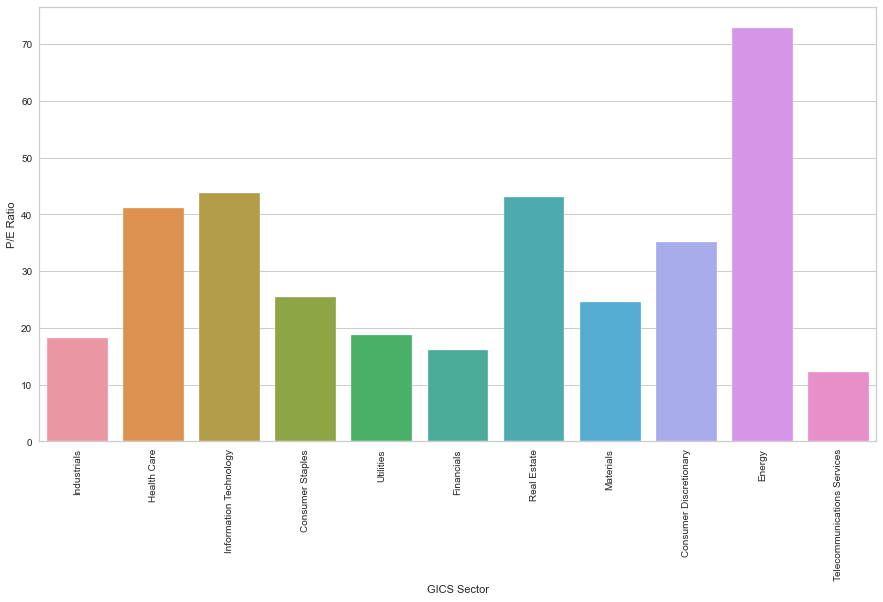

In [28]:
# plotting a barplot to visualize the relationship between "GICS Sector" and "P/E Ratio"
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation

The GICS Energy sector has the highest P/E ratio across all sectors at around 72, followed by the Information Technology sector at around 44, and Real Estate and Healthcare sectors following closely behind. This indicates that investors are willing to pay more for each dollar of earnings generated by companies in the Energy and Information Technology sectors, possibly due to expectations of future growth and profitability.

On the other hand, the sectors with the lowest P/E ratio across all sectors are Telecommunications at about 12 and Financials at about 16. This suggests that investors are not willing to pay as much for each dollar of earnings generated by companies in these sectors, possibly due to concerns about regulatory challenges or lower expected growth rates.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. We want to know how volatility varies, on average, across economic sectors.**

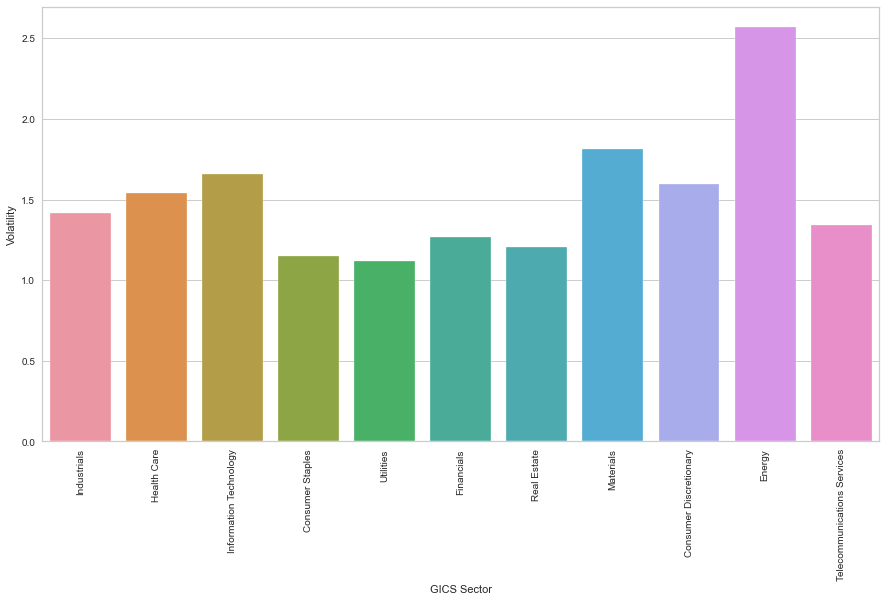

In [29]:
# plotting a barplot to visualize the relationship between "GICS Sector" and "Volatility"
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation

When GICS sectors are compared in terms of volatility, we found that the Energy sector is the most volatile with the highest standard deviation of all sectors at a deviation of about 2.6. Materials is the next highest sector at about 1.8 deviations. The sector with the least volatility is the Utilities sector at about 1.1, followed closely by Consumer Staples. This means that the Energy and Materials sectors are subject to greater fluctuations in stock prices than other sectors, which may make them more attractive to investors seeking higher potential returns but also exposes them to greater risks. On the other hand, the Utilities and Consumer Staples sectors are generally considered less risky investments due to their relatively stable stock prices. However, this may also result in lower potential returns. It is important for investors to consider their risk tolerance and investment goals when selecting investments from different GICS sectors.

## Data Preprocessing

### Outlier Check

- We'll plot the boxplots of all numerical columns to check for outliers.

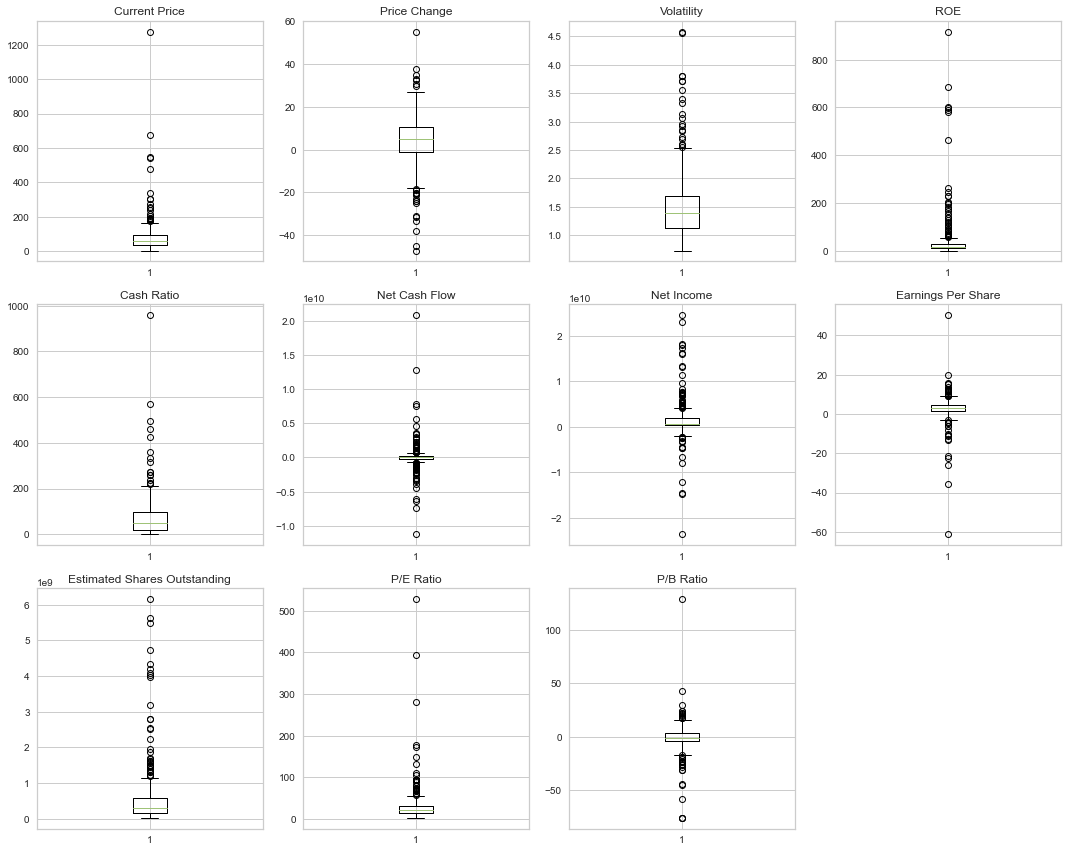

In [30]:
# iterating over the numeric columns and creating a box plot for each variable
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation

We plotted boxplots for each numerical attribute to visualize and detect outliers in the data. We observed numerous outliers in all attributes plotted. However, at this time, we have not removed or treated any outliers in the data because we need to determine if they are genuine values or errors. Outliers are a common occurrence in stock data, as fluctuations in the stock market are driven by several factors such as changes in company and industry performance, natural disasters, political events, trends, innovations, and more. Therefore, it is essential to first understand and verify the data before making any decisions about how to treat outliers so for now, we will leave the data as is.

### Scaling

- We want to scale the data before we proceed with clustering.

In [31]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.drop(["Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"], axis=1)
subset_scaled = scaler.fit_transform(subset)

In [32]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

### Observation

We scaled the data prior to clustering to ensure that all variables have equal importance in the analysis, and to avoid bias towards variables with larger scales or variances. Scaling standardizes the range and variance of the data, which makes it easier to compare the relative distances between observations in the multidimensional space. By scaling the data, we can ensure that each variable contributes equally to the clustering process and avoid any distortion in the results due to differences in the scale of the variables.

## K-means Clustering

### Checking Elbow Plot

In [33]:
# creating a copy of the scaled data
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


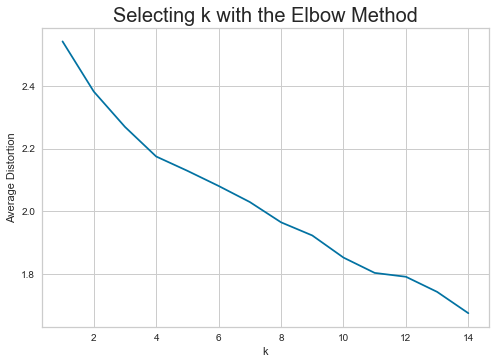

In [34]:
# calculating the average distortion for different values of k (number of clusters) using the K-means algorithm
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df) # fitting a KMeans model to the scaled data
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )
# calculating the distortion as the average of the minimum distances between each data point and the cluster centers
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

# plotting a line plot to visualize the average distortion for each value of k
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

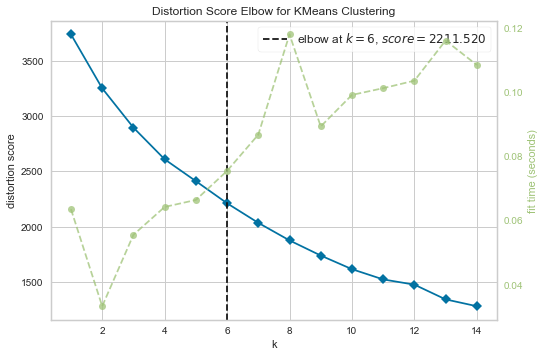

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# initializing a KMeans model and creating a KElbowVisualizer object with the model
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fitting the data to the visualizer
visualizer.show()  # finalizing and rendering figure

### Observation

We employed the K-means clustering algorithm on the scaled dataset with varying numbers of clusters from 1 to 14. To identify the optimal number of clusters for the dataset, we ran code to calculate the average distortion for each cluster size. We then plotted these distortions against the number of clusters and looked for the "elbow" point in the curve, which indicates the optimal number of clusters. We found that the graph had a curved line without any sharp points easily identifiable as our elbow point.

We then utilized the KElbowVisualizer, which fits the K-means model for each k value, computes the distortion score, and plots it on a line graph. We found that the elbow point in the graph occurred at k=6 (with a score of 2211.520), which suggests that six clusters best capture the underlying patterns in the data.

### Checking the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


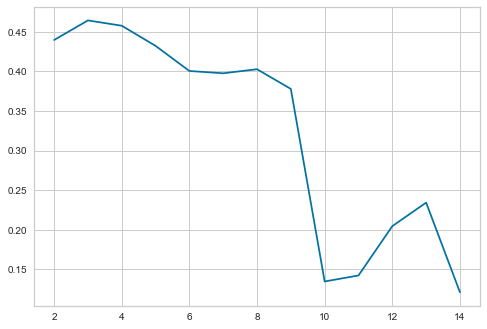

In [36]:
# calculating the silhouette score for different numbers of clusters using the KMeans algorithm 
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

# plotting a line graph showing the silhouette scores   
plt.plot(cluster_list, sil_score)
plt.show()

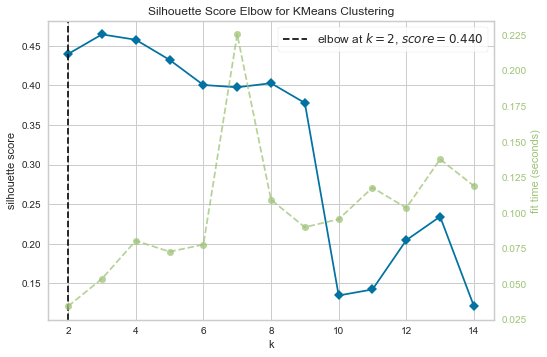

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [37]:
# initializing a KMeans model and creating a KElbowVisualizer object with the model 
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fitting the data to the visualizer
visualizer.show()  # finalizing and rendering figure

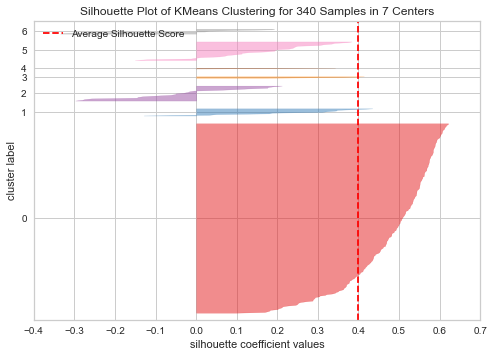

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
# finding optimal no. of clusters with silhouette coefficients and visualizing the silhouette score
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

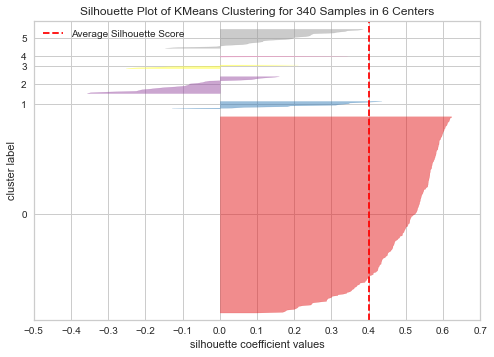

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
# finding optimal no. of clusters with silhouette coefficients and visualizing the silhouette score
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

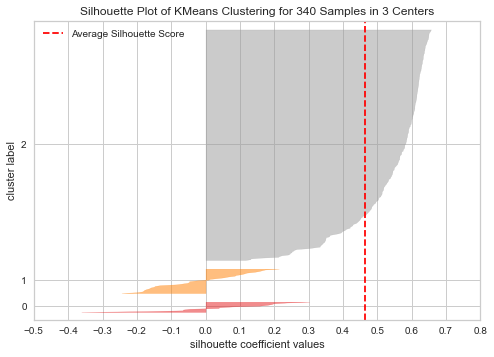

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
# finding optimal no. of clusters with silhouette coefficients and visualizing the silhouette score
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

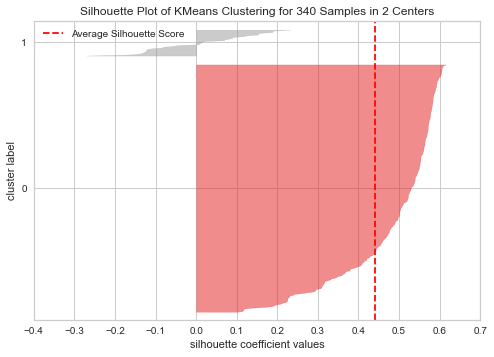

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
# finding optimal no. of clusters with silhouette coefficients and visualizing the silhouette score
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Observation

The elbow method  may not always provide a clear optimal number of clusters, especially if the data is complex or there is significant overlap between clusters so we employed the Silhouette score metric to assess the clustering performance for different values of k. Initially, we performed K-means clustering for a range of k values (2 to 14) and then calculated the Silhouette score for each clustering output. We then created a line plot of the Silhouette scores against the number of clusters to identify the optimal number of clusters for the data set. We utilized the KElbowVisualizer algorithm to compute the Silhouette score for each k value and plot the scores on a line graph. The elbow point in the graph, which represents the optimal number of clusters, is determined by the highest Silhouette score.
<p>Our silhouette analysis revealed that the line plot has several elbows, with the optimal point at k=2. Notably, the line plot for k values displayed a steep descent after k=2, followed by a slight rise and a steady decline. Although the Silhouette scores for k=3 were the highest among all possible outcomes, we chose k=2 as our optimal number of clusters based on the elbow plot. The results suggest that k=2 can best capture the underlying patterns in the data.</p>

### Creating Final Model

In [42]:
# choosing the number of clusters for the final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [43]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Observation

We obtained different optimal values of k using the Elbow Method and Silhouette Score. While the Elbow Method suggests k=6, the Silhouette Score suggests k=2, this means that these methods have different perspectives on what the optimal number of clusters should be.

However, upon further evaluation of the clusters formed by each method and their respective cluster profiles, we discovered that reducing the cluster size can significantly affect the computation of averages.

Given the complex and risky nature of stock investment, we determined that using k=2 would oversimplify our data and potentially lead to financial harm for our clients. As such, we decided to use the Elbow Method's recommendation of k=6. This will allow us to make more informed decisions and minimize risks associated with investing and trading stocks.

### Cluster Profiling

In [44]:
# grouping the cluster labels by "KM_segments" and calculating the mean value for each column within each group
km_cluster_profile = df1.groupby("KM_segments").mean()

In [45]:
# adding a new column "count_in_each_segment" to km_cluster_profile, which contains the count of occurrences of each "KM_segments" value in the "Security" column of the original dataframe 
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [46]:
# highlighting the maximum value in each column with the color "lightgreen"
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,73.854019,5.116180,1.369515,35.262963,50.637037,4512725.925926,1512994744.444444,3.723870,430296731.305963,23.486573,-3.567829,270
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,111.612223,11.789464,1.787972,26.125000,290.083333,1450830291.666667,1499538625.000000,2.993750,700417074.282083,44.575135,13.972648,24
3,557.499989,17.445166,1.714325,12.000000,158.000000,116336500.000000,773142833.333333,12.396667,215235860.658333,225.136796,7.666157,6
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27


### Observation

Upon analyzing the stock data, we have identified four distinct segments with unique characteristics:

<p>Segment 1, which contains 11 stock options, has the highest net income and estimated shares outstanding, indicating strong financial performance and growth potential.</p>
<p>Segment 2, with 24 stock options, stands out for its high cash ratio, net cash flow, and P/B ratio, suggesting a financially stable and undervalued group of stocks.</p>
<p>Segment 3, consisting of 6 stock options, is characterized by the highest current price, price change, and P/E ratio, indicating strong market performance and growth potential.</p>
<p>Segment 4, which contains only 2 stock options, has the highest volatility and Return on Earnings, making it a high-risk, high-reward investment opportunity.</p>
<p>By identifying these distinct segments, we can better understand the strengths and weaknesses of each stock option and make more informed investment decisions based on our risk tolerance and investment objectives.</p>

In [47]:
# code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Ca

In [48]:
# performing a groupby operation using "KM_segments" and "GICS Sector" and counting the number of occurrences of "Security" within each group
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    30
             Industrials                    51
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          4
             Consumer Staples                1
             Energy

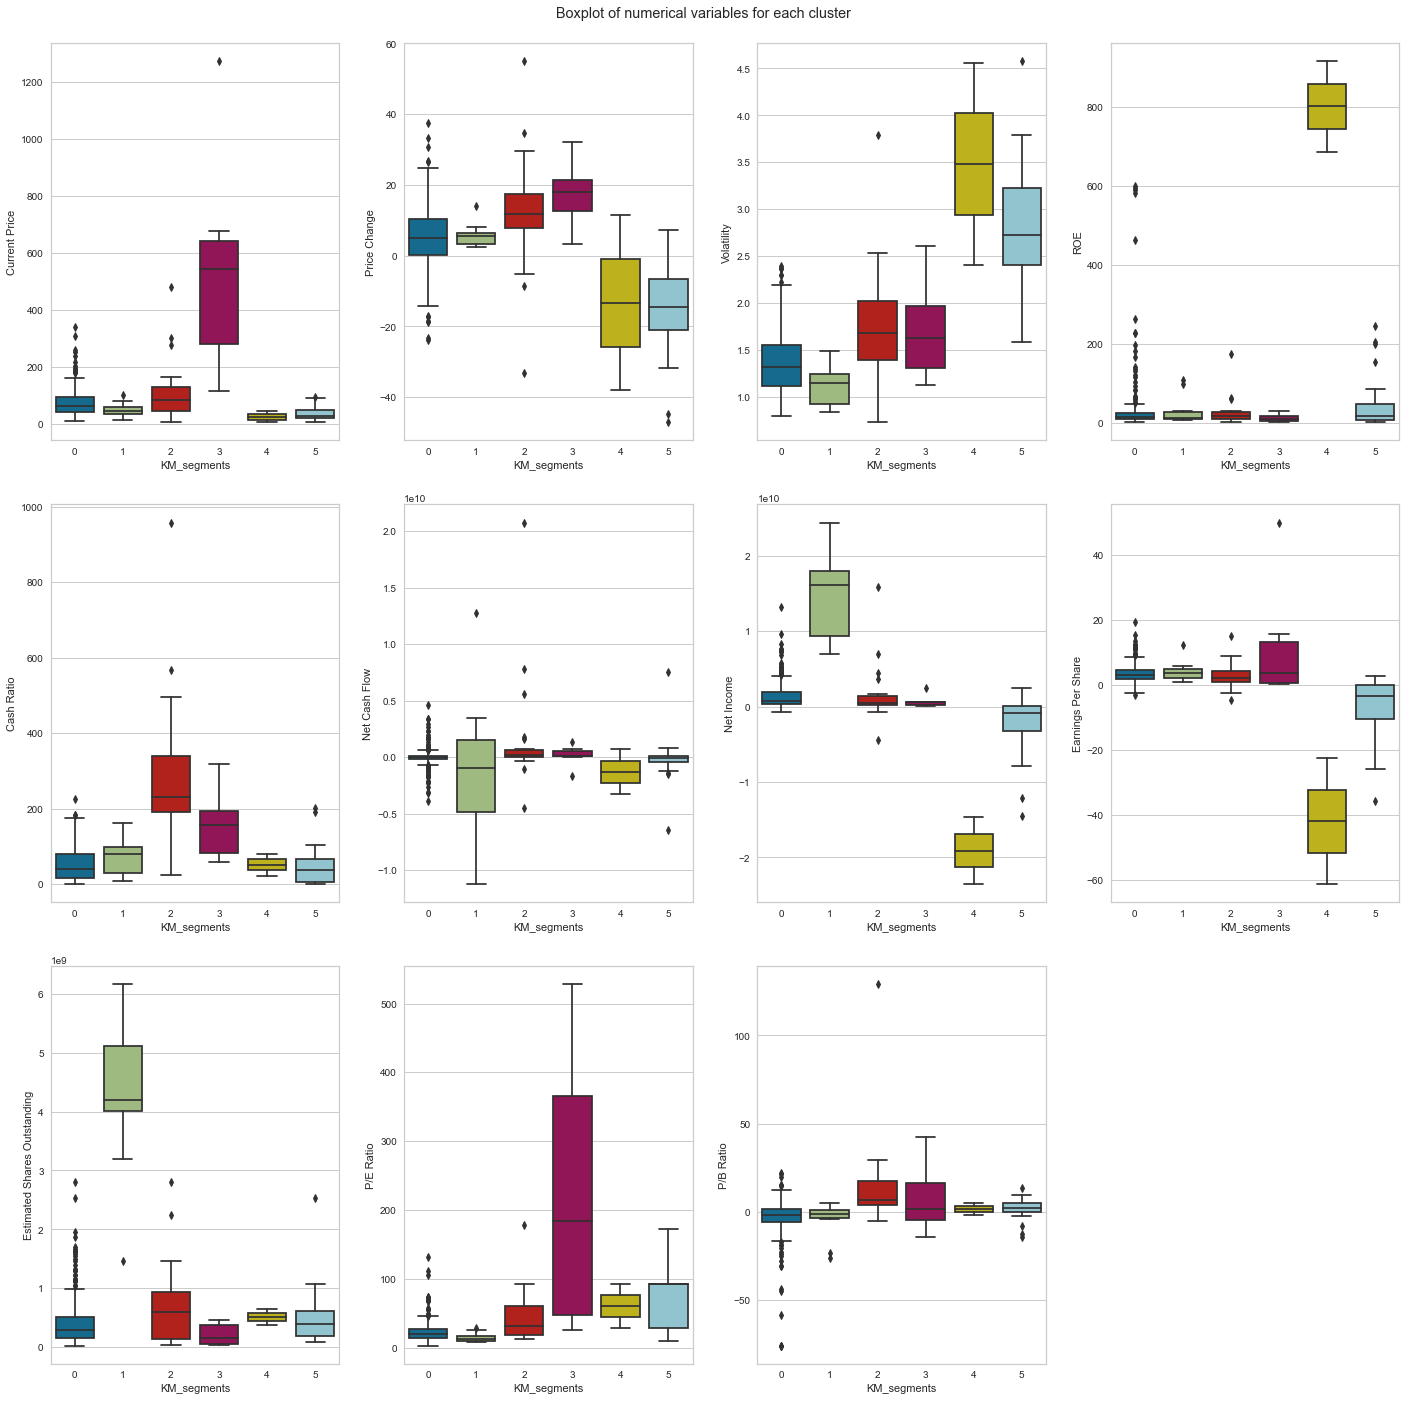

In [49]:
# plotting boxplots for numerical variables for each cluster and creating a subplot for each variable
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='KM_segments'>

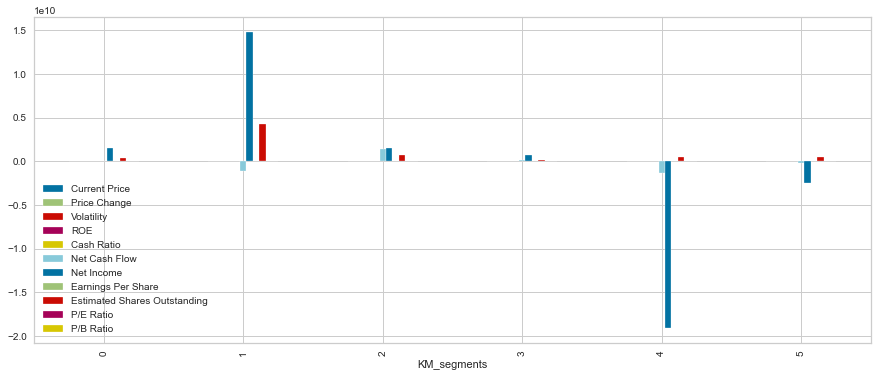

In [50]:
# grouping the data by "KM_segments" and creating a bar plot of the mean values for each cluster segment
df1.groupby("KM_segments").mean().plot.bar(figsize=(15, 6))

### Insights

- 


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [51]:
# creating a copy of the scaled data
hc_df = subset_scaled_df.copy()

In [52]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

# iterating over different distance metrics and linkage methods, and computes the cophenetic correlation coefficient for each combination
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm # tracking of the combination with the highest cophenetic correlation coefficient
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

**Exploring different linkage methods with Euclidean distance only.**

In [53]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", "centroid", "ward", "median"]

#  iterating over different linkage methods and computing the cophenetic correlation coefficient for each linkage method
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for median linkage is 0.9198690668829905.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


### Observation

We conducted hierarchical clustering on our scaled dataset, utilizing various distance metrics and linkage methods. We aimed to identify the combination of distance metric and linkage method that produced the highest cophenetic correlation coefficient. After exploring different options, we found that Euclidean distance, in conjunction with average linkage, generated the highest cophenetic correlation coefficient of 0.9422.
<p>This coefficient serves as an indicator of the quality of the clustering results, and suggests that this particular combination of distance metric and linkage method was most effective in preserving the original pairwise distances between data points in the hierarchical clustering.</p>

**Viewing the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

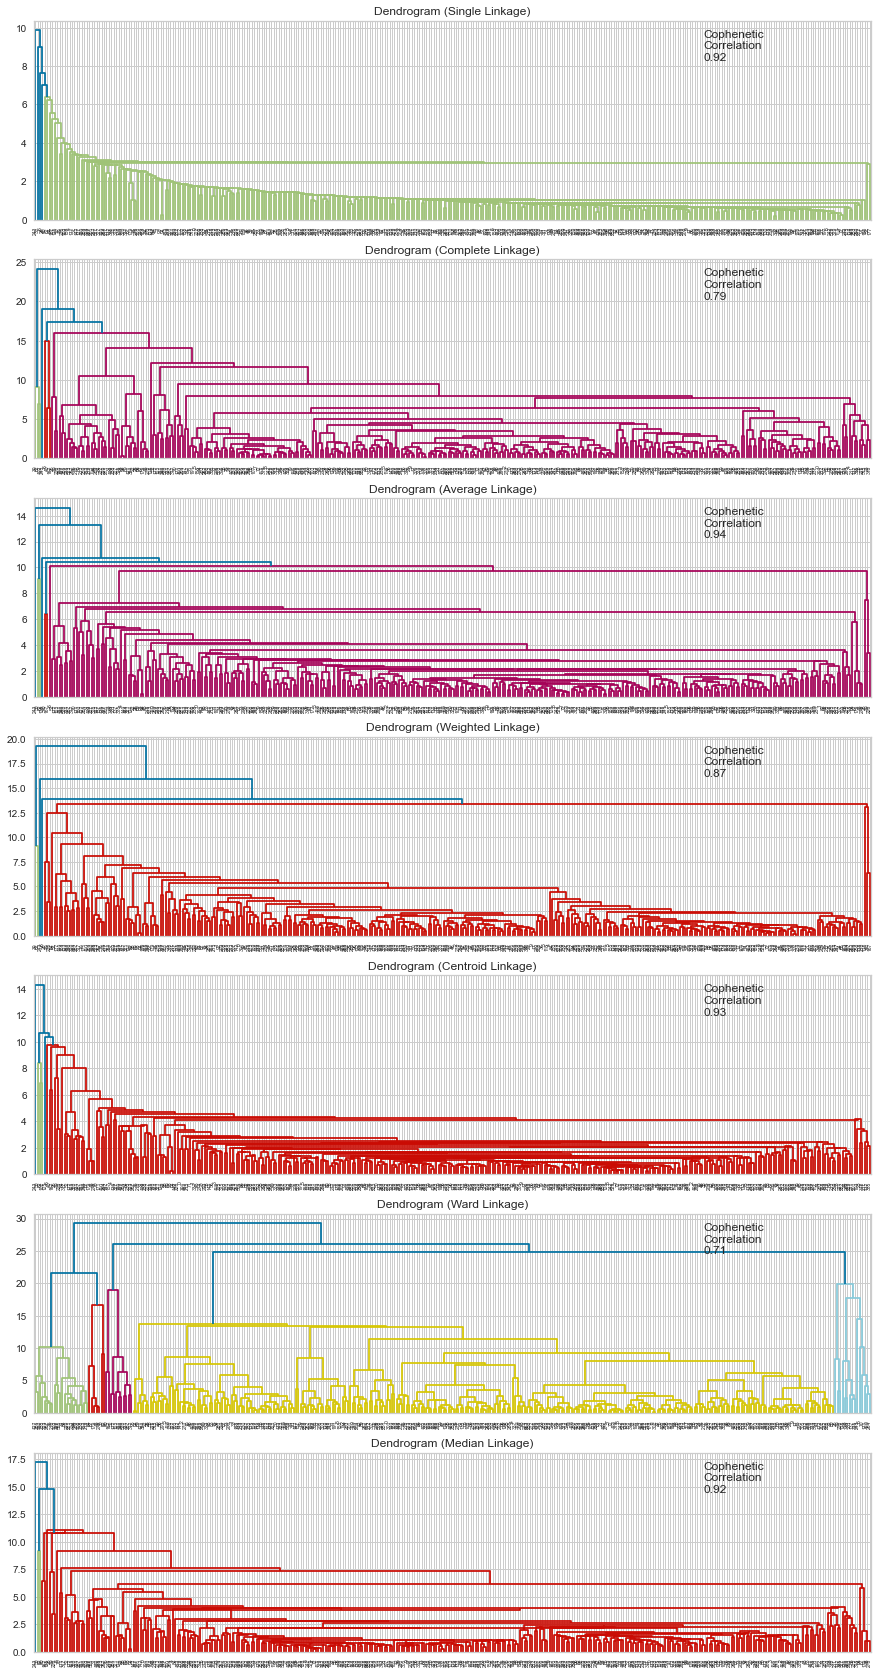

In [54]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", "centroid", "ward", "median"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# creating a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# enumerating through the list of linkage methods above
# plotting the dendrogram and calculating the cophenetic correlation for each linkage method
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [55]:
# creating and printing a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
5,ward,0.710118
1,complete,0.787328
3,weighted,0.869378
6,median,0.919869
0,single,0.923227
4,centroid,0.931401
2,average,0.942254


### Observation

After obtaining the dendrogram with the highest cophenetic correlation, which was obtained using Euclidean distance and average linkage, I decided on the optimal number of clusters for hierarchical clustering. To accomplish this, I examined cluster values ranging from 2 to 9 and assessed them against the cluster profile.

While comparing results, I identified that as the number of clusters gets smaller, we lose accuracy for simplicity, and this can affect the computation of averages. Therefore, I considered how the average scores changed as clusters became smaller, similar to what we did in K-Means clustering. Additionally, I selected six major evaluators from the attributes that are essential in evaluating stock/investment options. I monitored the average scores of these evaluators as we varied the number of clusters and found that n_clusters=7 preserved more accuracy in terms of combined data points, while allowing us to evaluate more segments based on a more accurate understanding of their pros and cons for the investor.

Since investing in stocks is a risky endeavor, it is best to avoid oversimplifying our data into very small groups in a way that could be financially harmful and irresponsible to our clients. Therefore, I recommend using n_clusters=7 to make more informed decisions and minimize risks associated with investing and trading stocks.

### Creating model using sklearn

In [56]:
# defining the hierarchical clustering model
HCmodel = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [57]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [58]:
# grouping the cluster labels by "HC_segments" and calculating the mean value for each column within each group
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [59]:
# adding a new column "count_in_each_segment" to hc_cluster_profile, which contains the count of occurrences of each "HC_segments" value in the "Security" column of the original dataframe
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [60]:
# highlighting the maximum value in each column with the color "lightgreen"
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,75.017416,3.937751,1.513415,35.621212,66.545455,-39846757.575758,1549443100.000000,2.904682,562266326.402576,29.091275,-2.146308,330


### Observation

After performing clustering analysis on the stock data, we have identified distinct segments based on the selected attributes. Each segment represents a group of stocks that share similar characteristics. The characteristics of each segment are summarized as follows:

Segment 0: This segment contains 2 stock options with the highest volatility and Return on Equity (ROE) among all the clusters. These stocks may be suitable for investors looking for high-risk, high-reward investments.

Segment 1: This segment contains 2 stock options with the highest net cash flow and net income. These stocks may be suitable for investors seeking stable and profitable investments.

Segment 2: This segment contains 3 stock options with the highest price change and P/E ratio. These stocks may be suitable for investors who prioritize growth potential.

Segment 3: This segment contains 1 stock option with the highest current price and earnings per share. This stock may be suitable for investors who prioritize stable and high-earning investments.

Segment 4: This segment contains 1 stock option with the highest cash ratio and estimated shares outstanding. This stock may be suitable for investors who value financial stability.

Segment 5: This segment contains 1 stock option with the highest P/B Ratio. This stock may be suitable for investors who prioritize value investing strategies.

Overall, these segments provide investors with valuable insights into the characteristics of each stock option, allowing them to make informed investment decisions based on their individual investment goals and risk tolerance levels.

In [61]:
# printing the list of companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 6, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scient

In [62]:
# performing a groupby operation using "HC_segments" and "GICS Sector" and counting the number of occurrences of "Security" within each group
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Energy                          2
1            Financials                      1
             Information Technology          1
2            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
6            Consumer Discretionary         38
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    39
             Industrials                    53
             Information Technology         29
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
Name: Security, dty

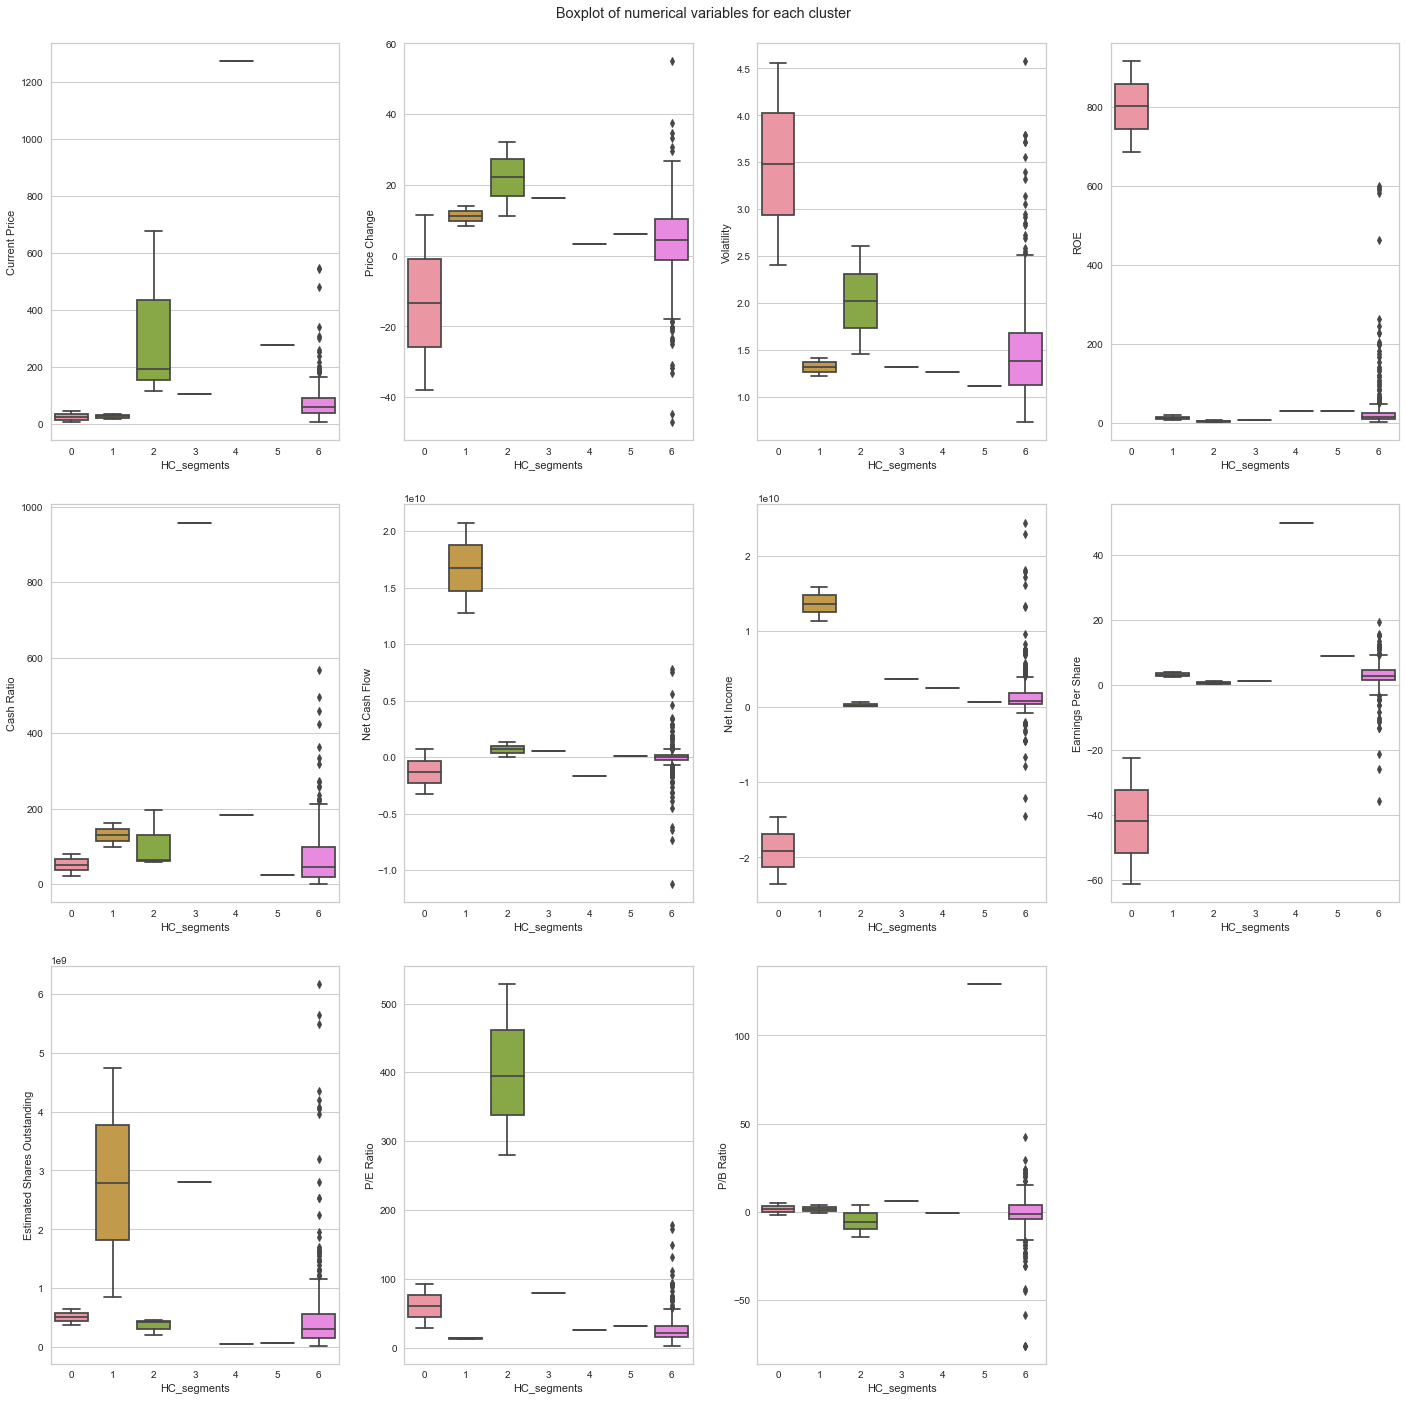

In [63]:
# plotting boxplots for numerical variables for each cluster and creating a subplot for each variable
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='HC_segments'>

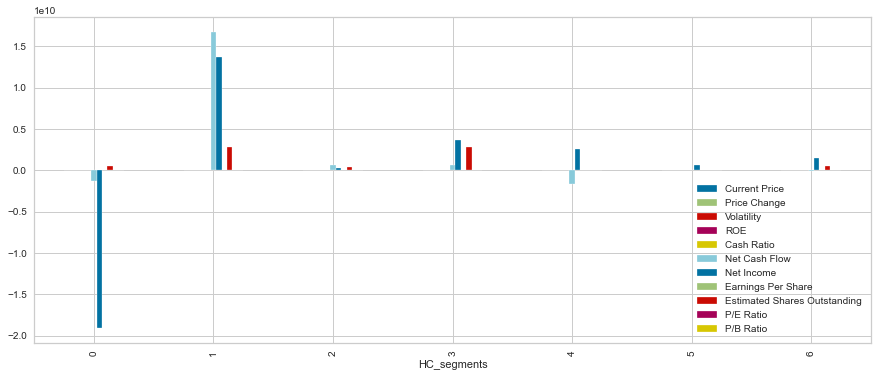

In [64]:
# grouping the data by the HC_segments and calculating the mean for each group, then creating a bar plot to visualize the mean values for each variable
df2.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

## K-means vs Hierarchical Clustering

We will compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave us more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

#### Comparison of K-Means and Hierarchical Clustering
- K-Means took less time to execute, with computation time within a few seconds compared to hierarchical clustering, which took around a minute or two to compute.

- In this particular case, K-means produced more distinct clusters than hierarchical clustering. This is evident when comparing both segments by their GICS sector.

- The largest clusters formed using both algorithms had 271 observations for K-means clustering and 330 observations for hierarchical clustering.

- The appropriate number of clusters chosen for K-means was k=6, while for hierarchical clustering, n_clusters=7 was chosen based on the evaluation of the dendrogram and the cluster profiles.

- The hierarchical clustering model appears to have preserved more accuracy around values within clusters compared to K-means clustering model.

In [65]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# using the KMeans algorithm to perform clustering on the data
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans_clusters=kmeans.fit_predict(k_means_df)

# performing Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=7)
h_clusters = HCmodel.fit_predict(k_means_df)

# computing adjusted Rand index to compare the two sets of clusters
ari = adjusted_rand_score(kmeans_clusters, h_clusters)

# printing the results
print("Adjusted Rand index between K-means and Hierarchical clustering: {}".format(ari))

Adjusted Rand index between K-means and Hierarchical clustering: 0.1760207045473513


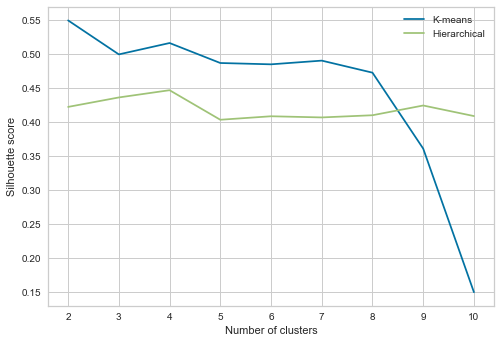

In [66]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# setting the range of number of clusters to test
min_clusters = 2
max_clusters = 10

# creating lists to store the silhouette scores for each technique
kmeans_scores = []
hierarchical_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    # applying K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    kmeans_labels = kmeans.fit_predict(k_means_df)
    kmeans_silhouette = silhouette_score(k_means_df, kmeans_labels)
    kmeans_scores.append(kmeans_silhouette)
    
    
    # applying hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical.fit_predict(hc_df)
    hierarchical_silhouette = silhouette_score(hc_df, hierarchical_labels)
    hierarchical_scores.append(hierarchical_silhouette)

# plotting the silhouette scores for each technique
import matplotlib.pyplot as plt

plt.plot(range(min_clusters, max_clusters+1), kmeans_scores, label='K-means')
plt.plot(range(min_clusters, max_clusters+1), hierarchical_scores, label='Hierarchical')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.legend()
plt.show()

In [67]:
# km_labels and hc_labels are the labels obtained from K-means and Hierarchical clustering respectively
km_cluster_count = len(set(kmeans_labels))
hc_cluster_count = len(set(hierarchical_labels))

# creating a dictionary to hold the counts for each similar cluster
similar_clusters_count = {}
for i in range(km_cluster_count):
    for j in range(hc_cluster_count):
        count = len(set(np.where(kmeans_labels == i)[0]) & set(np.where(hierarchical_labels == j)[0]))
        if count > 0:
            similar_clusters_count[(i, j)] = count

# printing the counts for each similar cluster
for cluster_pair, count in similar_clusters_count.items():
    print(f"Number of observations in similar cluster pair {cluster_pair}: {count}")

Number of observations in similar cluster pair (0, 0): 92
Number of observations in similar cluster pair (0, 2): 1
Number of observations in similar cluster pair (1, 9): 2
Number of observations in similar cluster pair (2, 0): 5
Number of observations in similar cluster pair (2, 4): 22
Number of observations in similar cluster pair (3, 0): 1
Number of observations in similar cluster pair (3, 5): 1
Number of observations in similar cluster pair (3, 6): 2
Number of observations in similar cluster pair (4, 0): 172
Number of observations in similar cluster pair (5, 0): 5
Number of observations in similar cluster pair (5, 1): 1
Number of observations in similar cluster pair (5, 2): 15
Number of observations in similar cluster pair (6, 8): 5
Number of observations in similar cluster pair (7, 5): 8
Number of observations in similar cluster pair (8, 3): 3
Number of observations in similar cluster pair (9, 1): 4
Number of observations in similar cluster pair (9, 7): 1


In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# determining the appropriate number of clusters for K-means algorithm
kmeans_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(subset_scaled_df)
    kmeans_scores.append(silhouette_score(subset_scaled_df, kmeans.labels_))

# determining the appropriate number of clusters for hierarchical clustering algorithm
hc_scores = []
for i in range(2, 10):
    hc = AgglomerativeClustering(n_clusters=i)
    hc.fit(subset_scaled_df)
    hc_scores.append(silhouette_score(subset_scaled_df, hc.labels_))

# determining the number of clusters for K-means and hierarchical clustering algorithms
num_kmeans_clusters = kmeans_scores.index(max(kmeans_scores)) + 2
num_hc_clusters = hc_scores.index(max(hc_scores)) + 2

# comparing the number of clusters obtained from both algorithms
if num_kmeans_clusters > num_hc_clusters:
    print(f"K-means algorithm produced {num_kmeans_clusters} clusters, while hierarchical clustering produced {num_hc_clusters} clusters")
elif num_kmeans_clusters < num_hc_clusters:
    print(f"Hierarchical clustering produced {num_hc_clusters} clusters, while K-means algorithm produced {num_kmeans_clusters} clusters")
else:
    print(f"Both algorithms produced {num_kmeans_clusters} clusters")


Hierarchical clustering produced 4 clusters, while K-means algorithm produced 3 clusters


## PCA

In [69]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [70]:
# displaying the last few rows of the dataframe
reduced_df_pca.tail()

,Component 1,Component 2
335,0.860894,1.453357
336,0.651640,-0.689641
337,0.505446,0.824131
338,0.353286,-0.152693
339,0.315878,0.470818


In [71]:
# printing the explained variance ratio for each principal component in the PCA analysis
print(
    "Explained variance per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variance per principal component: [0.22770322 0.14358674]


In [72]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.37128995677258525

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

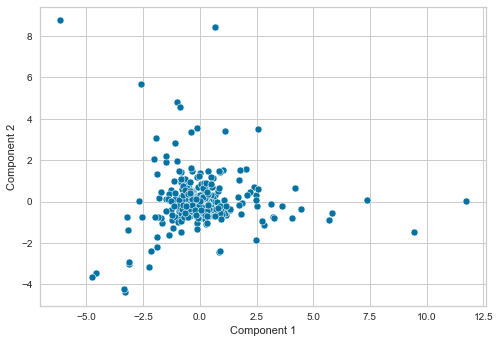

In [73]:
# creating a scatter plot to visualize the data points in the reduced PCA space
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

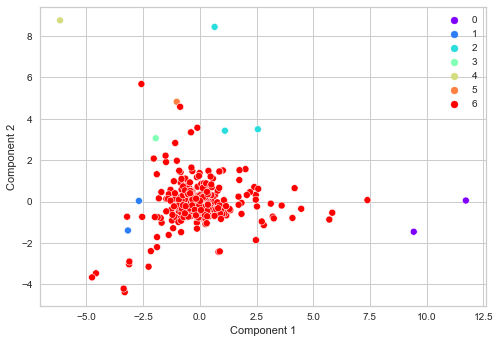

In [74]:
# creating a scatter plot using the reduced dataset with points colored based on assigned hierarchical clustering segments
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

In [75]:
from sklearn.manifold import TSNE

# applying t-SNE dimensionality reduction to the dataset
tsne = TSNE(n_components=2, random_state=1)
tsne_data = tsne.fit_transform(subset_scaled_df)

In [76]:
# creating a new dataframe using the t-SNE transformed data, and displaying the last few rows of the dataframe
tsne_df = pd.DataFrame(data=tsne_data, columns=["Component 1", "Component 2"])
tsne_df.tail()

,Component 1,Component 2
335,10.832344,9.559889
336,-16.298714,3.012274
337,-9.177835,-9.452691
338,1.227342,0.855794
339,-2.591636,-4.179144


In [77]:
# creating a list called targets containing the unique values from the "HC_segments" column
targets = list(df2.HC_segments.unique())
targets

[6, 5, 2, 0, 1, 3, 4]

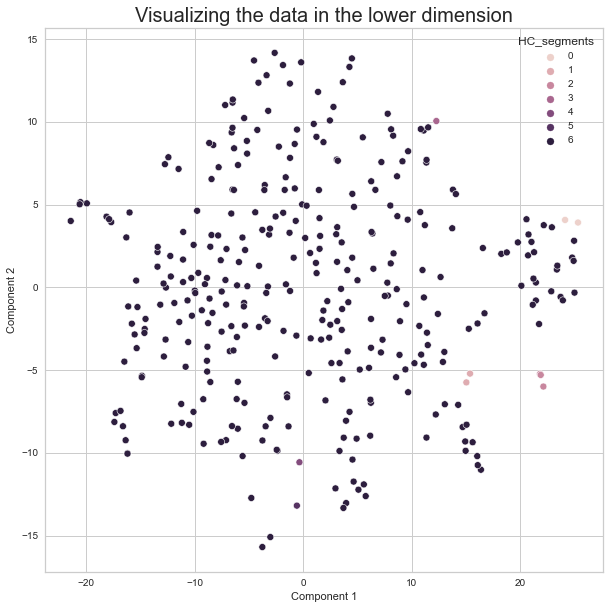

In [78]:
# visualizing the data in the lower-dimensional space using a scatter plot with colored data points
plt.figure(figsize=(10, 10))
sns.scatterplot(data=tsne_df, x="Component 1", y="Component 2", hue=df2.HC_segments)
plt.title("Visualizing the data in the lower dimension", fontsize=20)
plt.show()

## Actionable Insights and Recommendations

1.) The GICS Energy sector stands out with the highest P/E ratio across all sectors, approximately 72. The Information Technology sector closely follows with an average P/E ratio of around 44. The Real Estate and Healthcare sectors also show relatively high P/E ratios, with values closely trailing those of the Information Technology sector.
- This indicates that investors are willing to pay more for each dollar of earnings generated by companies in the Energy and Information Technology sectors, possibly due to expectations of future growth and profitability. Investment decision should be made after considering all relevant factors, including the current market conditions, economic trends, and financial performance of individual companies within the sector.

2.) When comparing GICS sectors in terms of volatility, the Energy sector was found to be the most volatile while the Utilities sector was found to have the least volatility.
- The suitability of investing in the Energy sector depends on an investor's risk tolerance and investment objectives. While the Utilities sector is the least volatile of all sectors, it may not always be the most suitable option due to the low cash ratios and P/E ratios associated with this sector.

3.) While the healthcare sector has demonstrated a positive price change with an average increase of approximately 9 dollars per stock, the energy sector has experienced a significant negative price change with an average decrease of over -10 dollars per stock.
- The Energy sector's high P/E ratio, while attractive to some investors, must be balanced against its high volatility. The fluctuations in this sector's performance signal the need for careful monitoring. Investors who are risk averse may find other sectors such as Healthcare to be less risky options.

4.) Our heatmap shows a strong positive correlation (0.59) between estimated shares outstanding and net income, indicating that as net income increases, the number of outstanding shares is likely to increase as well. Additionally, there is a positive correlation (0.56) between earnings per share and net income that suggests the same.
- Investors should carefully consider the potential dilution of their holdings when investing in companies with high estimated shares outstanding. They should also closely monitor changes in net income to assess the impact on earnings per share and overall financial performance.

5.) Strong financial positions of Information Technology companies are indicated by their high cash ratios, allowing for financial flexibility and potential growth and innovation. Conversely, the low cash ratio of the Utilities sector implies weaker financial positions.
- Investors should consider investing in companies within the Information Technology sector due to their strong financial positions. However, investors may want to exercise caution when investing in companies within the Utilities sector, as their weaker financial positions could limit their ability to innovate and grow.

6.) We utilized both K-Means and Hierarchical Clustering algorithms to develop a model for identifying diverse segments of stock options for the firm's client portfolio.
- Based on our analysis, I recommend using the K-Means Clustering algorithm to build the clustering model, as it generated more diverse segments compared to the Hierarchical Clustering algorithm.

___